In [ ]:
import torch
from torch import nn

import matplotlib.pyplot as plt

import numpy as np

In [ ]:

model = nn.Sequential(
    nn.Linear(1, 4),
    nn.Sigmoid(),
    nn.Linear(4, 1),
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

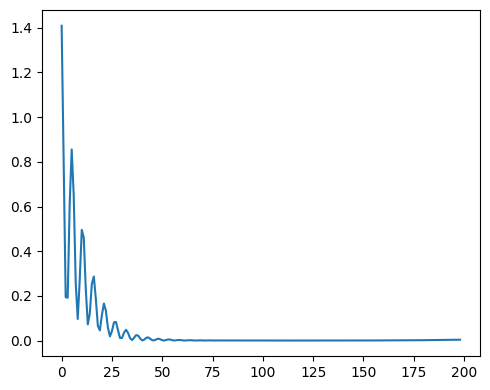

In [ ]:
loss_list=[]

# dy/dx + 2y = 2x**2 + 6x +2 , y(0) = 0.0

x = np.linspace(0,1,200)

for i in range(len(x)-1):
    y0 = model(torch.tensor([0.0]))
    xa = float(x[i])
    xb = float(x[i+1])
    ya = model(torch.tensor([xa]))
    yb = model(torch.tensor([xb]))

    dy = (yb-ya)/(xb-xa)

    loss1 = criterion(dy + 2*yb , torch.tensor([ 2*xb**2 + 6*xb + 2 ]))
    loss2 = criterion(y0, torch.tensor([0.0]))
    loss = loss1 + loss2

    ####################
    loss_list.append(loss.item())
    ####################
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(loss_list)

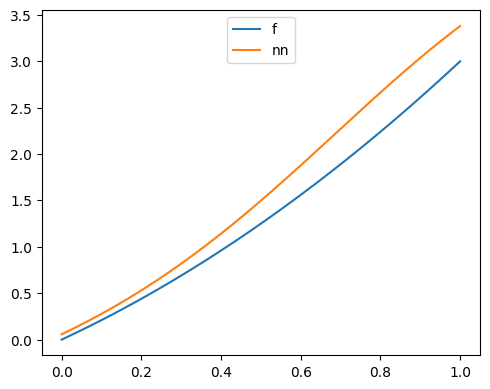

In [ ]:
x = np.linspace(0,1,200)
y=[]
for i in range(len(x)):
    y.append(model(torch.tensor([float(x[i])]))[0].item())


plt.rcParams["figure.figsize"] = [5, 4]
plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(x , x**2 + 2*x , label="f")
line2, = plt.plot(x , y , label="nn")

leg = plt.legend(loc='upper center')
plt.show()

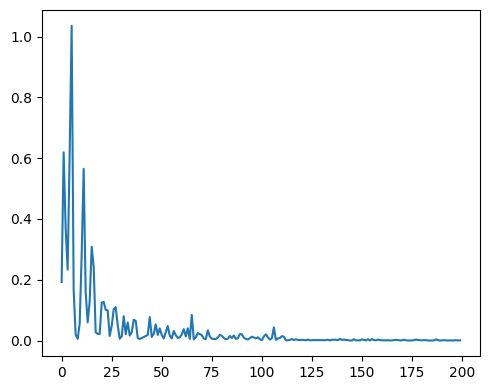

In [ ]:
import random
loss_list=[]

# dy/dx + 2y = 2x**2 + 6x +2 , y(0) = 0.0

x = np.linspace(0,1,200)

for _ in range(200):
    i = random.randint(1,98)
    y0 = model(torch.tensor([0.0]))
    xa = float(x[i])
    xb = float(x[i+1])
    ya = model(torch.tensor([xa]))
    yb = model(torch.tensor([xb]))

    dy = (yb-ya)/(xb-xa)

    loss1 = criterion(dy + 2*yb , torch.tensor([2*xb**2 + 6*xb + 2 ]))
    loss2 = criterion(y0, torch.tensor([0.0]))
    loss = loss1 + loss2

    ####################
    loss_list.append(loss.item())
    ####################
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(loss_list)

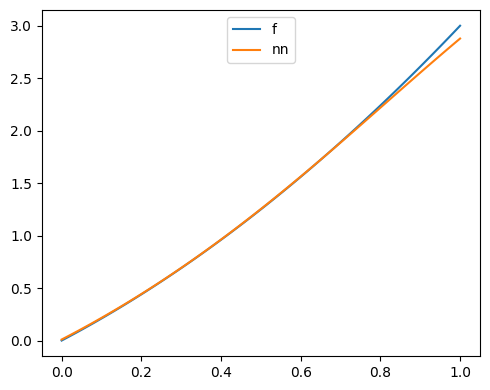

In [ ]:
x = np.linspace(0,1,100)
y=[]
for i in range(len(x)):
    y.append(model(torch.tensor([float(x[i])]))[0].item())


plt.rcParams["figure.figsize"] = [5, 4]
plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(x , x**2 + 2*x , label="f")
line2, = plt.plot(x , y , label="nn")
#line3, = plt.plot(x , 2*x+1 , label="df/dx")
leg = plt.legend(loc='upper center')
plt.show()